C:\Users\stepan\AppData\Local\Temp\ipykernel_21208\173041382.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189509 entries, 0 to 1189508
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   url         1189509 non-null  object
 1   title       1189509 non-null  object
 2   text        1189508 non-null  object
 3   topic       1127478 non-null  object
 4   tags        460068 non-null   object
 5   date        1189509 non-null  object
 6   num_links   1189509 non-null  int64 
 7   num_images  1189509 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 72.6+ MB
None

Первые строки:
                                         url  \
0  https://lenta.ru/news/2010/01/01/charges/   
1       https://lenta.ru/news/2010/01/01/eu/   
2    https://lenta.ru/news/2010/01/01/voice/   
3    https://lenta.ru/news/2010/01/01/three/   
4    https://lenta.ru/news/2010/01/01/free1/   

                                               title  \
0  С пяти сотрудников Blackwater

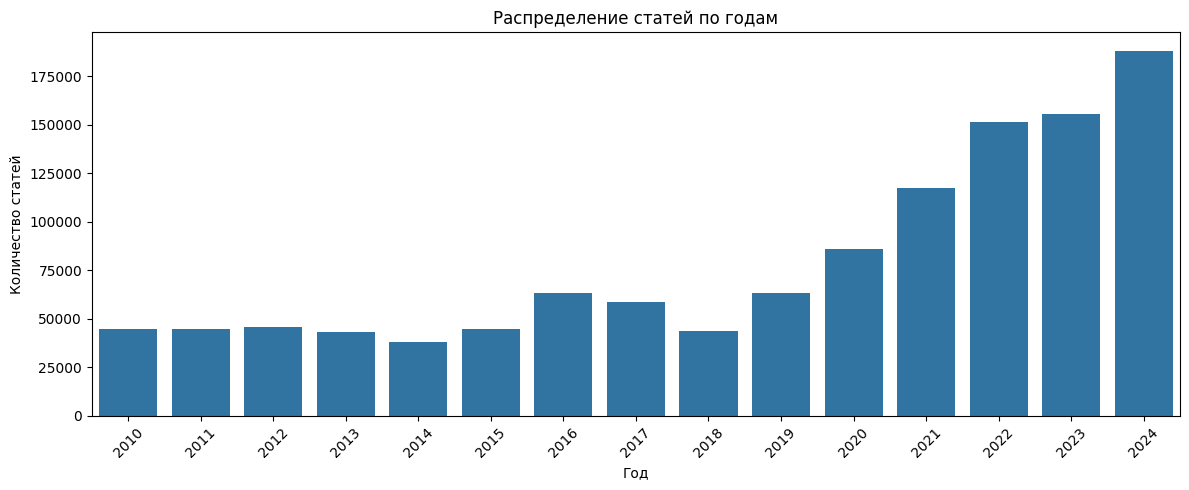


Средняя длина текста по темам (в словах):
topic
Бизнес               227.389867
Забота о себе        224.977217
Легпром              210.605263
Экономика            207.238717
Из жизни             198.972637
Среда обитания       193.934842
Дом                  193.425653
Крым                 193.055556
Наука и техника      192.673654
Интернет и СМИ       192.212695
Мотор                190.000000
Оружие               186.642857
Нацпроекты           179.582325
Россия               177.586578
Библиотека           176.483333
Путешествия          171.310199
Бывший СССР          170.395834
Ценности             170.236446
Мир                  169.177198
Культпросвет         165.838235
Культура             165.508253
Силовые структуры    154.628429
69-я параллель       150.083444
Моя страна           145.240739
Спорт                140.339820
Сочи                 122.000000
ЧМ-2014              120.500000
Победа               109.000000
МедНовости            95.000000
Name: text_length, dtyp

In [1]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пути к файлу (замени на свой путь, если нужно)
file_path = 'lenta-ru-news_2010_2024.csv'

# Загрузка данных
df = pd.read_csv(file_path)

# Базовый просмотр
print("\nСтруктура данных:")
print(df.info())

print("\nПервые строки:")
print(df.head())

print("\nСтолбцы:")
print(df.columns.tolist())

# Проверка пропусков
print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())

# Проверка дубликатов
print("\nКоличество полных дубликатов записей:", df.duplicated().sum())

# Быстрая проверка уникальных тем
print("\nУникальные темы (первые 10):")
print(df['topic'].unique()[:10])

# Количество статей на каждую тему
topic_counts = df['topic'].value_counts()
print("\nРаспределение статей по темам:")
print(topic_counts)

# --- Дополнительный анализ ---
# --- Дополнительный анализ ---

# Преобразуем столбец date в формат datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Новый столбец с годом, месяцем и днём
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# --- Анализ года ---
print("\nРаспределение статей по годам:")
print(df['year'].value_counts().sort_index())

# --- Анализ месяца ---
print("\nРаспределение статей по месяцам:")
print(df['month'].value_counts().sort_index())

# --- Анализ дня ---
print("\nРаспределение статей по дням месяца:")
print(df['day'].value_counts().sort_index())

# График количества статей по годам
plt.figure(figsize=(12, 5))
sns.countplot(x='year', data=df, order=sorted(df['year'].dropna().unique()))
plt.title('Распределение статей по годам')
plt.xlabel('Год')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Средняя длина текста по темам
df['text_length'] = df['text'].fillna('').apply(lambda x: len(x.split()))
mean_text_length = df.groupby('topic')['text_length'].mean().sort_values(ascending=False)

print("\nСредняя длина текста по темам (в словах):")
print(mean_text_length)

# Самые короткие и самые длинные статьи
print("\nСтатьи с минимальной длиной:")
print(df[df['text_length'] == df['text_length'].min()][['title', 'text']])

print("\nСтатьи с максимальной длиной:")
print(df[df['text_length'] == df['text_length'].max()][['title', 'text']])


In [18]:
# --- Дополнительный подробный анализ (текстовый вывод) ---

# Общая информация
print(f"\nВсего записей после загрузки: {len(df)}")

# --- Пропуски ---
print("\nПропуски по столбцам:")
print(df.isnull().sum())

# --- Уникальные значения ---
print("\nКоличество уникальных тем:", df['topic'].nunique())
print("Количество уникальных лет:", df['year'].nunique())
print("Количество уникальных месяцев:", df['month'].nunique())
print("Количество уникальных дней:", df['day'].nunique())

# --- Статистика по длине текста ---
df['text_length'] = df['text'].fillna('').apply(lambda x: len(x.split()))
print("\nСтатистика длины текстов (в словах):")
print(df['text_length'].describe())

# --- Тема с наибольшим количеством статей ---
top_topic = df['topic'].value_counts().idxmax()
print(f"\nТема с наибольшим количеством статей: {top_topic} ({df['topic'].value_counts().max()} статей)")

# --- Год с наибольшим количеством статей ---
top_year = df['year'].value_counts().idxmax()
print(f"Год с наибольшим количеством статей: {top_year} ({df['year'].value_counts().max()} статей)")

# --- Месяц с наибольшим количеством статей ---
top_month = df['month'].value_counts().idxmax()
print(f"Месяц с наибольшим количеством статей: {top_month} ({df['month'].value_counts().max()} статей)")

# --- День месяца с наибольшим количеством статей ---
top_day = df['day'].value_counts().idxmax()
print(f"День месяца с наибольшим количеством статей: {top_day} ({df['day'].value_counts().max()} статей)")

# --- Средняя длина текста по темам ---
mean_text_length = df.groupby('topic')['text_length'].mean().sort_values(ascending=False)
print("\nСредняя длина текста по темам (в словах):")
print(mean_text_length)

# --- Самые короткие и длинные статьи ---
print("\nСтатьи с минимальной длиной текста:")
print(df[df['text_length'] == df['text_length'].min()][['title', 'text', 'topic']])

print("\nСтатьи с максимальной длиной текста:")
print(df[df['text_length'] == df['text_length'].max()][['title', 'text', 'topic']])

# --- Распределение по годам ---
print("\nКоличество статей по годам:")
print(df['year'].value_counts().sort_index())

# --- Распределение по месяцам ---
print("\nКоличество статей по месяцам:")
print(df['month'].value_counts().sort_index())

# --- Распределение по дням месяца ---
print("\nКоличество статей по дням месяца:")
print(df['day'].value_counts().sort_index())

# --- Распределение по темам ---
print("\nКоличество статей по темам:")
print(df['topic'].value_counts())



Всего записей после загрузки: 1189509

Пропуски по столбцам:
url                 0
title               0
text                1
topic           62031
tags           729441
date                0
num_links           0
num_images          0
year                0
month               0
day                 0
text_length         0
dtype: int64

Количество уникальных тем: 29
Количество уникальных лет: 15
Количество уникальных месяцев: 12
Количество уникальных дней: 31

Статистика длины текстов (в словах):
count    1.189509e+06
mean     1.770892e+02
std      7.961469e+01
min      0.000000e+00
25%      1.280000e+02
50%      1.610000e+02
75%      2.060000e+02
max      2.478000e+03
Name: text_length, dtype: float64

Тема с наибольшим количеством статей: Россия (211960 статей)
Год с наибольшим количеством статей: 2024 (188219 статей)
Месяц с наибольшим количеством статей: 10 (108967 статей)
День месяца с наибольшим количеством статей: 20 (40792 статей)

Средняя длина текста по темам (в словах):
top

In [13]:
df.head()

,url,title,text,topic,tags,date,year,text_length
0,https://lenta.ru/news/2010/01/01/charges/,С пяти сотрудников Blackwater сняли обвинения ...,"Американский суд в четверг, 31 декабря, снял о...",Мир,Все,2010-01-01,2010,160
1,https://lenta.ru/news/2010/01/01/eu/,Новым председателем Евросоюза стала Испания,Новым председателем Евросоюза с 1 января 2010 ...,Мир,Все,2010-01-01,2010,74
2,https://lenta.ru/news/2010/01/01/voice/,Замаскированного под Деда Мороза Кадырова узна...,Президент Чечни Рамзан Кадыров принял участие ...,Россия,Все,2010-01-01,2010,114
3,https://lenta.ru/news/2010/01/01/three/,В Дагестане ликвидированы трое лидеров боевиков,"Трое из четверых боевиков, ликвидированных в Х...",Россия,Все,2010-01-01,2010,145
4,https://lenta.ru/news/2010/01/01/free1/,"Задержанных в Москве ""несогласных"" выпустили н...",Сотрудники милиции отпустили несколько десятко...,Россия,Все,2010-01-01,2010,124


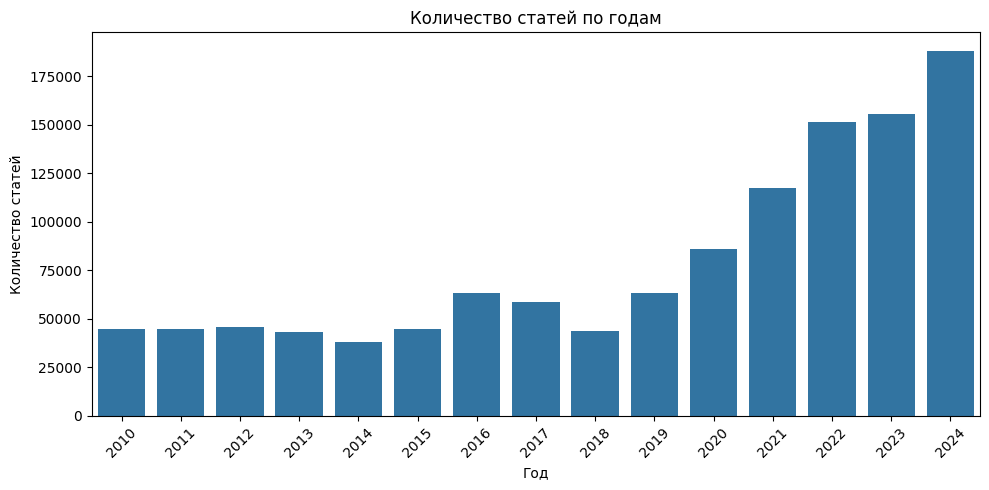

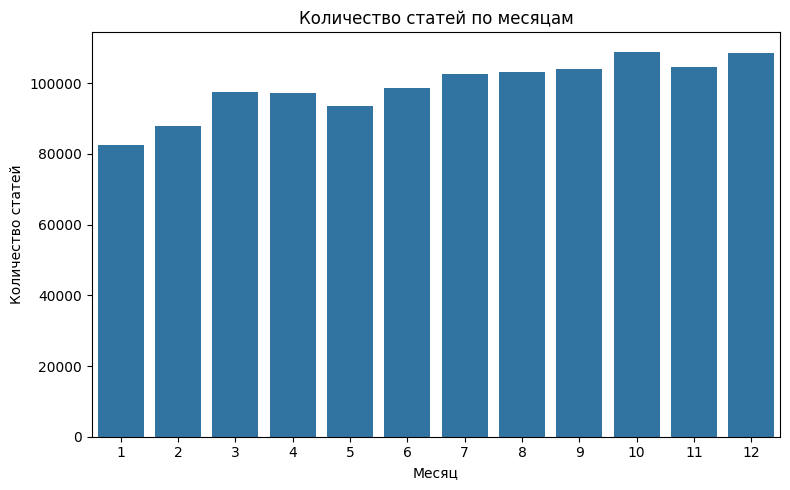

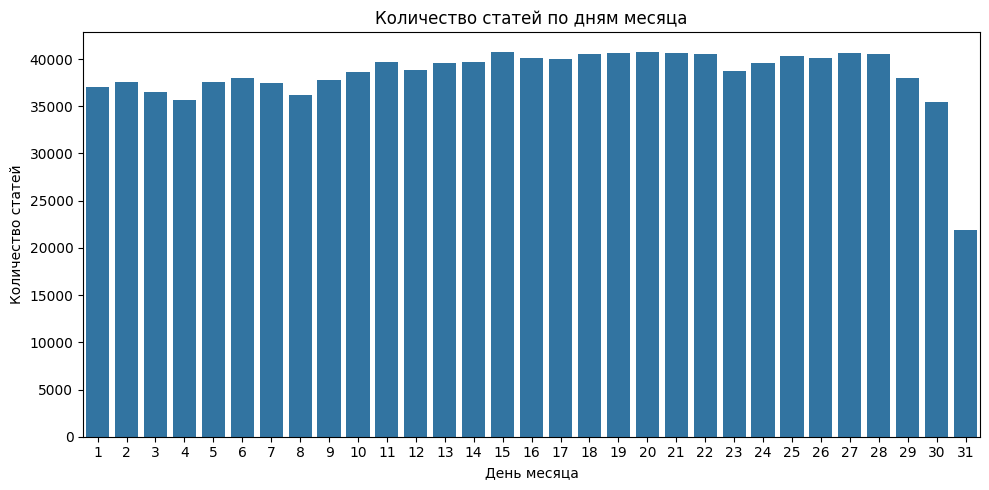

In [16]:
# --- Визуализация распределения по годам ---
plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=df, order=sorted(df['year'].dropna().unique()))
plt.title('Количество статей по годам')
plt.xlabel('Год')
plt.ylabel('Количество статей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Визуализация распределения по месяцам ---
plt.figure(figsize=(8, 5))
sns.countplot(x='month', data=df, order=range(1, 13))
plt.title('Количество статей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()

# --- Визуализация распределения по дням месяца ---
plt.figure(figsize=(10, 5))
sns.countplot(x='day', data=df, order=range(1, 32))
plt.title('Количество статей по дням месяца')
plt.xlabel('День месяца')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()


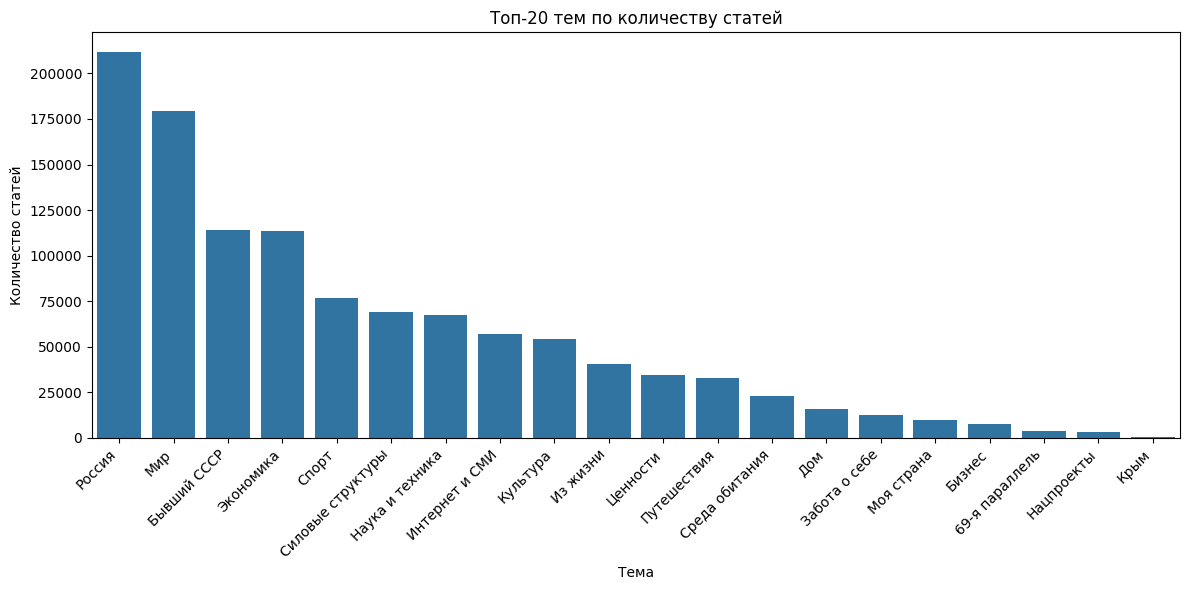

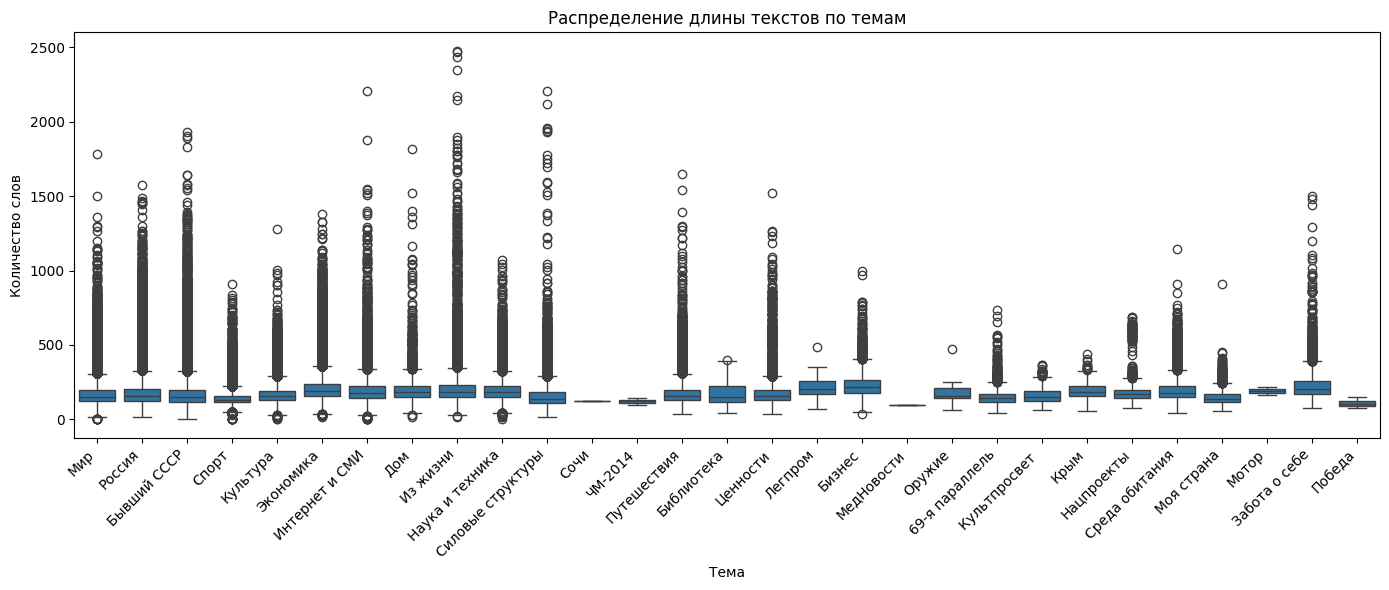

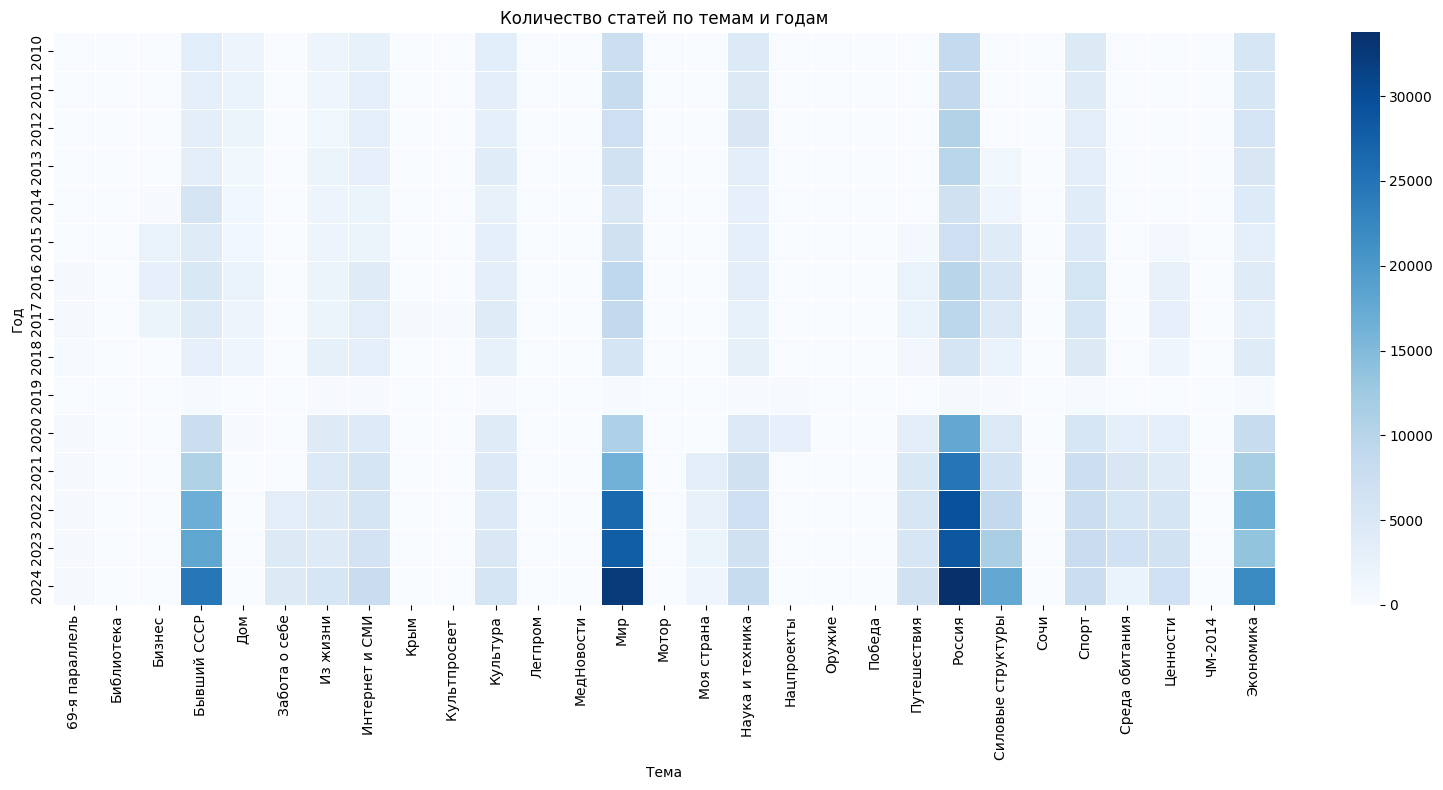

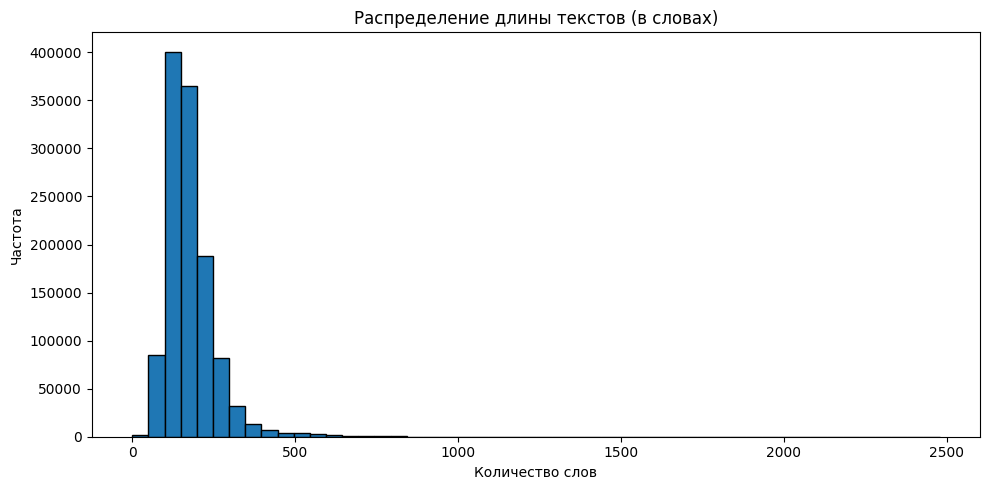

In [17]:
# 1. Распределение статей по темам (barplot)
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index[:20], y=topic_counts.values[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Топ-20 тем по количеству статей')
plt.xlabel('Тема')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()

# 2. Распределение длин текстов по темам (boxplot)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='topic', y='text_length')
plt.xticks(rotation=45, ha='right')
plt.title('Распределение длины текстов по темам')
plt.xlabel('Тема')
plt.ylabel('Количество слов')
plt.tight_layout()
plt.show()

# 4. Heatmap: количество статей по темам и годам
pivot = df.pivot_table(index='year', columns='topic', values='text', aggfunc='count').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap='Blues', linewidths=.5)
plt.title('Количество статей по темам и годам')
plt.xlabel('Тема')
plt.ylabel('Год')
plt.tight_layout()
plt.show()

#5. Распределение длины текстов (гистограмма)
plt.figure(figsize=(10, 5))
plt.hist(df['text_length'], bins=50, edgecolor='k')
plt.title('Распределение длины текстов (в словах)')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


In [17]:
df["date"] = df["url"].str.extract(r"/news/(\d{4}/\d{2}/\d{2})")

# Преобразуем строку в дату
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")

# Теперь узнаем самую первую и самую последнюю дату
first_date = df["date"].min()
last_date = df["date"].max()

print(f"Первая дата в датасете: {first_date.date()}")
print(f"Последняя дата в датасете: {last_date.date()}")

Первая дата в датасете: 1914-09-16
Последняя дата в датасете: 2019-12-14


In [21]:
# Выводим текст первой статьи
first_article_text = df.loc[0, "text"]
print(first_article_text)
num_chars = len(first_article_text)
print(f"Количество символов: {num_chars}")
num_words = len(first_article_text.split())
print(f"Количество слов: {num_words}")

Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера к Осовцу начал артиллерийскую борьбу с крепостью. В артиллерийском бою принимают участие тяжелые калибры. С раннего утра 14 сентября огонь достиг значительного напряжения. Попытка германской пехоты пробиться ближе к крепости отражена. В Галиции мы заняли Дембицу. Большая колонна, отступавшая по шоссе от Перемышля к Саноку, обстреливалась с высот нашей батареей и бежала, бросив парки, обоз и автомобили. Вылазки гарнизона Перемышля остаются безуспешными. При продолжающемся отступлении австрийцев обнаруживается полное перемешивание их частей, захватываются новые партии пленных, орудия и прочая материальная часть. На перевале Ужок мы разбили неприятельский отряд, взяли его артиллерию и много пленных и, продолжая преследовать, вступили в пределы Венгрии. 
«Русский инвалид», 16 сентября 1914 года.
Количество символов: 901
Количество слов: 118


In [ ]:
first_article_text)

In [ ]:
# --- Очистка датасета ---

# 1. Удаляем записи без текста или темы
print(f"До удаления пропусков: {df.shape}")
df = df.dropna(subset=['text', 'topic']).reset_index(drop=True)
print(f"После удаления пропусков: {df.shape}")

# 2. Удаляем темы с количеством статей < 100
topic_counts = df['topic'].value_counts()
topics_to_keep = topic_counts[topic_counts >= 100].index

print(f"\nТем, где >= 100 статей: {len(topics_to_keep)}")

df = df[df['topic'].isin(topics_to_keep)].reset_index(drop=True)
print(f"После удаления редких тем: {df.shape}")

# 3. Проверим финальное распределение тем
print("\nРаспределение статей по темам после чистки:")
print(df['topic'].value_counts())

До удаления пропусков: (800975, 8)
После удаления пропусков: (738973, 8)

Тем, где >= 100 статей: 18
После удаления редких тем: (738901, 8)

Распределение статей по темам после чистки:
topic
Россия               160445
Мир                  136621
Экономика             79528
Спорт                 64413
Культура              53797
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44663
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Name: count, dtype: int64


In [10]:
print("\nКоличество пропусков по столбцам:")
print(df.isnull().sum())



Количество пропусков по столбцам:
url                      0
title                    0
text                     0
topic                    0
tags                 26314
date                     0
text_length_chars        0
text_length_words        0
dtype: int64


In [4]:
df['tags'].unique()

array(['Все', nan, 'Преступность', 'Происшествия', 'Искусство', 'Бизнес',
       'Техника', 'ТВ и радио', 'Политика', 'Пресса', 'Музыка', 'Люди',
       'Звери', 'Игры', 'Общество', 'Госэкономика', 'Гаджеты', 'Наука',
       'Еда', 'Рынки', 'Деньги', 'Кино', 'Летние виды', 'Интернет',
       'Театр', 'Конфликты', 'Реклама', 'Космос', 'Бокс и ММА', 'Футбол',
       'Книги', 'Зимние виды', 'Достижения', 'Coцсети', 'Вещи', 'События',
       'Средняя Азия', 'Прибалтика', 'Украина', 'Закавказье',
       'Белоруссия', 'Молдавия', 'Софт', 'Квартира', 'Город', 'Дача',
       'Офис', 'Оружие', 'Мнения', 'Первая мировая', 'Москва', 'Регионы',
       'Полиция и спецслужбы', 'Криминал', 'Следствие и суд', 'Движение',
       'Производители', 'Мировой бизнес', 'Финансы компаний',
       'Деловой климат', 'Мир', 'Россия', 'Часы', 'Явления', 'Стиль',
       'Инструменты', 'Вооружение', 'Вкусы', 'Страноведение',
       'Госрегулирование', 'История', 'Внешний вид', 'Автобизнес',
       'Аналитика рынка'

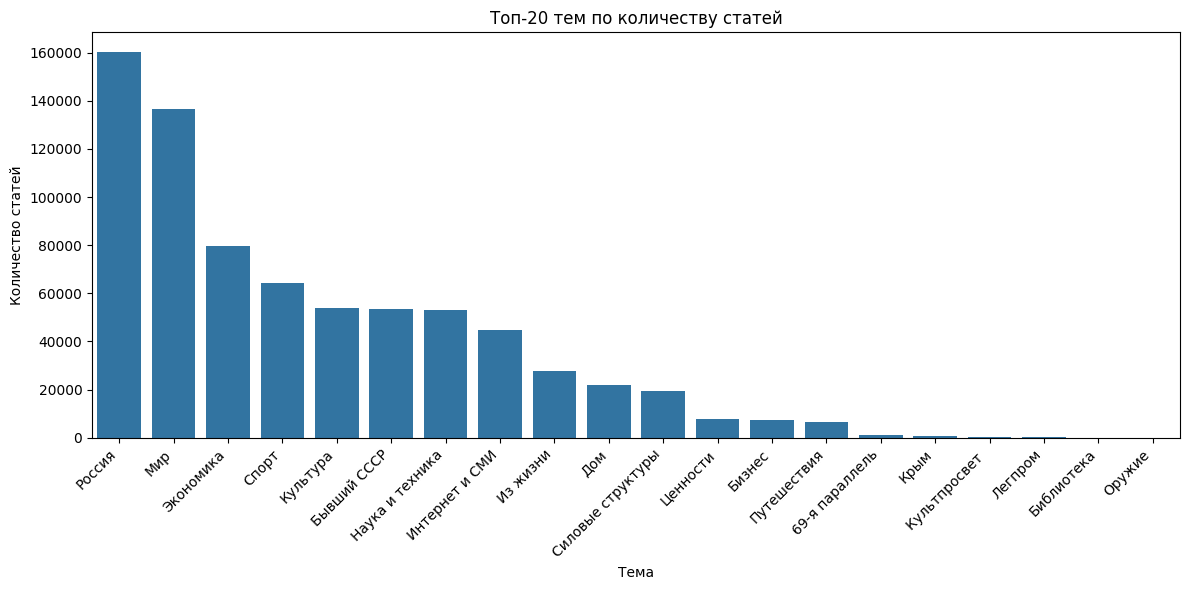


Статистика по длине текстов в символах:
count    800975.000000
mean       1332.301192
std         548.050115
min           0.000000
25%         978.000000
50%        1254.000000
75%        1599.000000
max       55387.000000
Name: text_length_chars, dtype: float64

Статистика по длине текстов в словах:
count    800975.000000
mean        180.298994
std          73.708885
min           0.000000
25%         133.000000
50%         170.000000
75%         216.000000
max        8092.000000
Name: text_length_words, dtype: float64


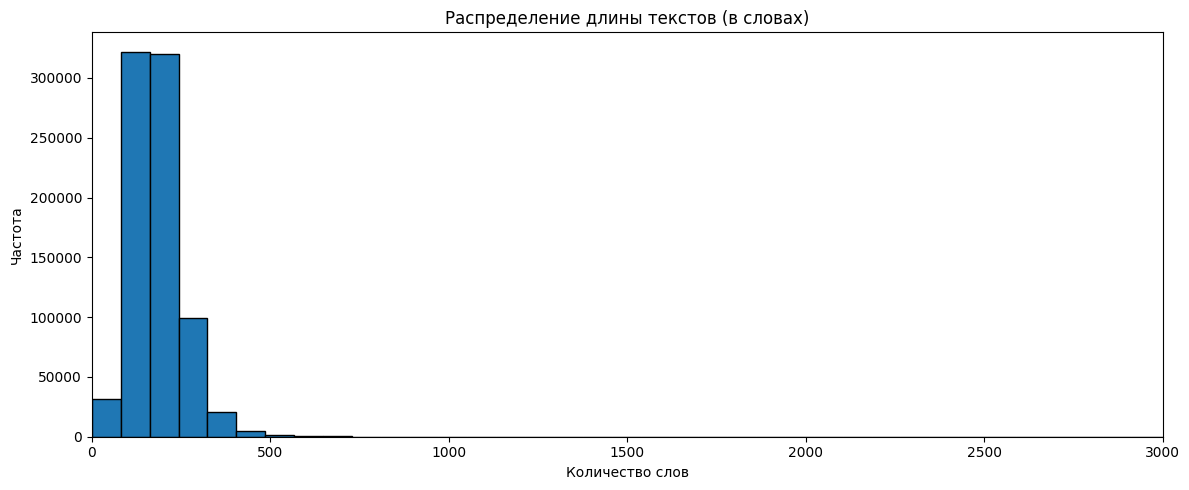


Примеры статей по разным темам:

Тема: Библиотека
Заголовок: 1914. Стрелы с бензином против германских дирижаблей 
Текст: Французский изобретатель по фамилии Герр (Guerre) придумал особого рода стрелы, целью которых, главным образом будут дирижабли. Такая стрела состоит из крепкой стальной иглы. Своим стержнем она входит в цилиндрический резервуар, наполненный 0.2 литрами бензина. Шесть маленьких крючков задерживают стрелу, когда она попадает в предмет из ткани или тому подобный. Когда стрела попадает в цель, она одновременно входит в цилиндр и ударяет в капсюль, от которого воспламеняется бензин. Маленькие стальны ...

Тема: Россия
Заголовок: Из-за аварии на газопроводе в Москве эвакуировали 200 человек
Текст: Около 200 человек были эвакуированы из-за аварии на газовой трубе на северо-востоке Москвы, сообщает РИА Новости со ссылкой на правоохранительные органы. На данный момент люди уже вернулись домой. Участок трубы, на котором произошел разрыв, примыкает к восьмиэтажному администра

In [8]:
# --- График распределения статей по темам ---
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index[:20], y=topic_counts.values[:20])
plt.xticks(rotation=45, ha='right')
plt.title('Топ-20 тем по количеству статей')
plt.xlabel('Тема')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()

# --- Анализ текстов ---
# Заполняем пропуски в текстах пустыми строками
df['text'] = df['text'].fillna('')

# Длина текста в символах и словах
df['text_length_chars'] = df['text'].apply(len)
df['text_length_words'] = df['text'].apply(lambda x: len(x.split()))

print("\nСтатистика по длине текстов в символах:")
print(df['text_length_chars'].describe())

print("\nСтатистика по длине текстов в словах:")
print(df['text_length_words'].describe())

# Графики распределения длины текстов
plt.figure(figsize=(12, 5))
plt.hist(df['text_length_words'], bins=100, edgecolor='k')
plt.xlim(0, 3000)
plt.title('Распределение длины текстов (в словах)')
plt.xlabel('Количество слов')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# --- Примеры текстов ---
print("\nПримеры статей по разным темам:")
for topic in df['topic'].unique()[:5]:
    sample = df[df['topic'] == topic].sample(1, random_state=42)
    print(f"\nТема: {topic}")
    print("Заголовок:", sample['title'].values[0])
    print("Текст:", sample['text'].values[0][:500], '...')


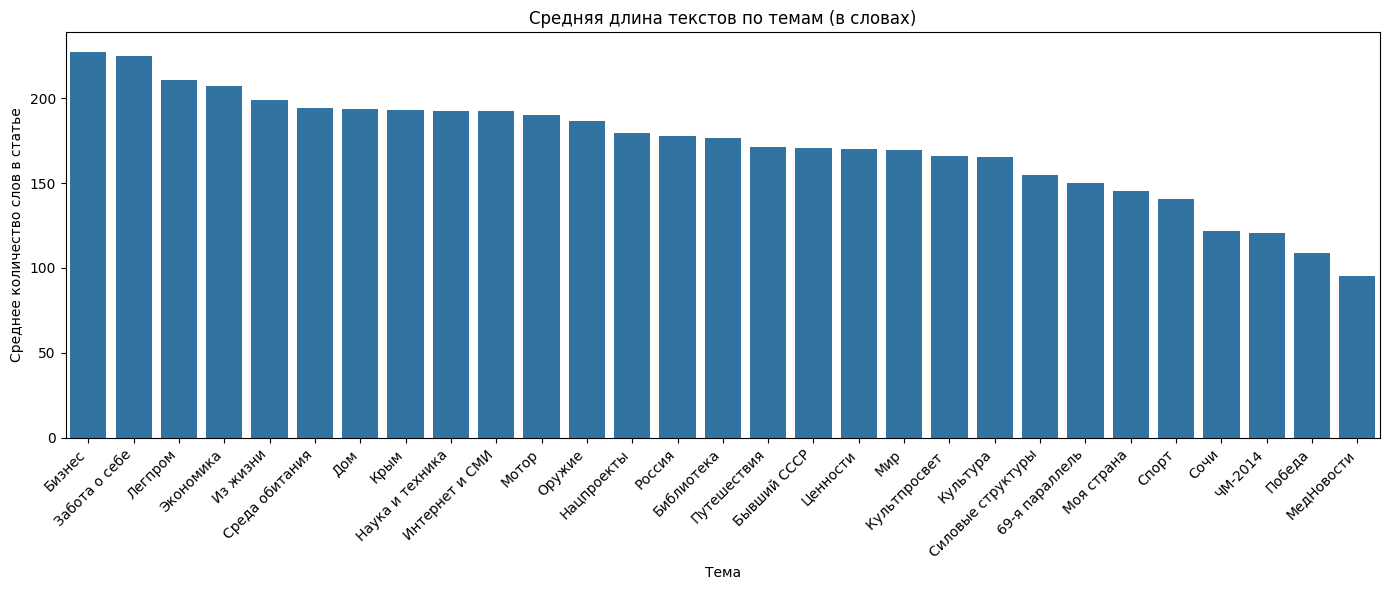

In [3]:
# --- Средняя длина текстов по темам ---
avg_length_by_topic = df.groupby('topic')['text_length'].mean().sort_values(ascending=False)

# Визуализация
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_length_by_topic.index, y=avg_length_by_topic.values)
plt.xticks(rotation=45, ha='right')
plt.title('Средняя длина текстов по темам (в словах)')
plt.xlabel('Тема')
plt.ylabel('Среднее количество слов в статье')
plt.tight_layout()
plt.show()

In [7]:
# --- Предобработка текстов ---

import re
from sklearn.preprocessing import LabelEncoder

# Функция очистки текста
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Убираем множественные пробелы и переносы строк
    text = re.sub(r'[^\w\s]', '', text)  # Убираем все знаки препинания
    text = text.strip().lower()  # Приводим к нижнему регистру
    return text

# Применяем очистку
df['clean_text'] = df['text'].apply(clean_text)

# Удаляем ненужные столбцы
df_model = df[['clean_text', 'topic']].copy()

# Кодируем темы в числа
label_encoder = LabelEncoder()
df_model['label'] = label_encoder.fit_transform(df_model['topic'])

# Сохраним словарь кодирования (если понадобится при обучении)
topic_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("\nПример отображения тем:")
print(topic_mapping)

# Посмотрим результат
print("\nПервые строки подготовленного датасета:")
print(df_model.head())

# --- Готово для подачи в модели ---


TypeError: expected string or bytes-like object, got 'float'

In [ ]:
import pandas as pd

# Загружаем таблицу
df = pd.read_csv("lenta-ru-news.csv", encoding="utf-8")

# 1. Извлечь дату из URL
df["date"] = df["url"].str.extract(r"/news/(\d{4}/\d{2}/\d{2})")
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")

# 2. Вытащить год
df["year"] = df["date"].dt.year

# 3. Вытащить месяц
df["month"] = df["date"].dt.month

# 4. Вытащить день
df["day"] = df["date"].dt.day

# 5. Посчитать количество слов в тексте
df["text_length_words"] = df["text"].astype(str).apply(lambda x: len(x.split()))

# 6. Посчитать количество символов в тексте
df["text_length_chars"] = df["text"].astype(str).apply(len)

# Сохраняем новую расширенную таблицу
df.to_csv("lenta-ru-news-extended.csv", index=False, encoding="utf-8")

# Выводим первые строки для проверки
print(df.head())


In [1]:
import os

def scan_directory(root_dir):
    tree = {}
    for dirpath, dirnames, filenames in os.walk(root_dir):
        rel_path = os.path.relpath(dirpath, root_dir)
        tree[rel_path] = {
            'dirs': dirnames,
            'files': filenames
        }
    return tree

In [3]:
path = r'E:/универ/диплом/code/VKR_news_classification'
structure = scan_directory(path)
print(structure)

{'.': {'dirs': ['.git', 'app', 'notebooks', 'rubert_final_model', 'scripts'], 'files': ['compose.sh', 'docker-compose.yml', 'Dockerfile', 'README.md', 'rubert_label_encoder.pkl']}, '.git': {'dirs': ['hooks', 'info', 'logs', 'objects', 'refs'], 'files': ['COMMIT_EDITMSG', 'config', 'description', 'FETCH_HEAD', 'HEAD', 'index', 'ORIG_HEAD', 'packed-refs']}, '.git\\hooks': {'dirs': [], 'files': ['applypatch-msg.sample', 'commit-msg.sample', 'fsmonitor-watchman.sample', 'post-update.sample', 'pre-applypatch.sample', 'pre-commit.sample', 'pre-merge-commit.sample', 'pre-push.sample', 'pre-rebase.sample', 'pre-receive.sample', 'prepare-commit-msg.sample', 'push-to-checkout.sample', 'sendemail-validate.sample', 'update.sample']}, '.git\\info': {'dirs': [], 'files': ['exclude']}, '.git\\logs': {'dirs': ['refs'], 'files': ['HEAD']}, '.git\\logs\\refs': {'dirs': ['heads', 'remotes'], 'files': []}, '.git\\logs\\refs\\heads': {'dirs': [], 'files': ['main']}, '.git\\logs\\refs\\remotes': {'dirs': ['